# Example 6.1: Pullout from rigid matrix revisited -- energy dissipation
This example shows the analytically solved model - the simplest possible configuration 

In [40]:
%reset -f
import sympy as sp
import numpy as np
from IPython.display import display
from sympy.plotting import plot as splot, plot3d as splot3d
sp.init_printing()

## Variables involved in the boundary value problem
#### Geometrical parameters
-  $A_\mathrm{f}$ | Cross section area modulus of the reinforcement
-  $p$: Perimeter of the reinforcement
-  $L_\mathrm{f}$: Free length of the pulled-out bar

#### Coordinate variable
-  $x$: Longitudinal coordinate

#### Material parameters
-  $E_\mathrm{f}$: Young's modulus of the reinforcement
-  $\tau$: Frictional bond stress

#### Control parameter
-  $P, w$: Pullout force, pullout displacement

#### State parameter
-  $a$: Length of the debonded zone

#### Integration constants
-  $C,D$: Integration constants to be resolved through boundary and continuity conditions

In [41]:
E_f, A_f, tau, p = sp.symbols('E_f, A_f, tau, p')
C, D = sp.symbols('C, D')
P, w = sp.symbols('P, w')
x, a, L_b = sp.symbols('x, a, L_b')

## Embedded length: equilibrium, elasticity and compatibility 
In the halfspace $x \in (-\infty, 0)$ the governing equations take the folowing form:<br>
__Equilibrium__: The equilibrium equation along the free length of the bar introduces the equivalence between the normal force in the reinforcement $\sigma_\mathrm{f} A_\mathrm{f}$ and and the bond intensity within an ifinitesimal element $\mathrm{d}x$
\begin{align}
\frac{\partial \sigma_\mathrm{f}}{\partial x} &= \frac{p \tau}{A_\mathrm{f}}.
\end{align}
By integrating this equation we obtain the stress as an unknown constant
\begin{align}
\sigma_\mathrm{f}(x) &=  \frac{p \tau}{A_\mathrm{f}} x + C.
\end{align}
__Elasticity__: Assuming linear elastic behavior with the Young's modulus $E_\mathrm{f}$ we obtain the strain $\varepsilon$ as
\begin{align}
\varepsilon_\mathrm{f}(x) = \frac{1}{E_\mathrm{f}} \left(\frac{p \tau}{A_\mathrm{f}} x + C \right).
\end{align}
__Kinematics__: The displacement of the bar within the free length is obtained as an integral
\begin{align}
u_\mathrm{f}(x) = 
\frac{p \tau x^{2}}{2 A_\mathrm{f} E_\mathrm{f}} + \frac{C x}{E_{\mathrm{f}}} + D 
\end{align}

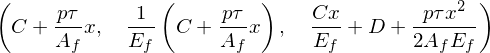

In [42]:
d_sig_f = p * tau / A_f
sig_f = sp.integrate(d_sig_f, x) + C
eps_f = sig_f / E_f
u_f = sp.integrate(eps_f, x) + D
sig_f, eps_f, u_f # check

### Resolving for integration constants (step 1)
__Condition 1__: Stress in the free length must be equal to $\sigma(0) = P/A_\mathrm{f}$.<br> 

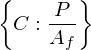

In [43]:
eq_C = {P - sig_f.subs({x:0}) * A_f}
C_subs = sp.solve(eq_C,{C})
C_subs # display the result

### Resolving for integration constants (step 2)
The solution for the integration constant $D$ requires a second thought. Can we say something about how does the displacement approach zero within the embedded length? 

__Condition 2__: We can postulate, that at some unkonwn distance $a$, the slip between the reinforcement and the matrix will be zero, i.e. $u_\mathrm{f}(a) = 0$.

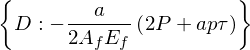

In [44]:
eqns_D = {u_f.subs(C_subs).subs({x:a})}
D_subs = sp.solve(eqns_D,{D})
D_subs

However, this postulate does not solve the problem. This additional condition has introduced an additional uknown parameter $a$ so that the problem is still not solvable and another boundary or continuity condition needs to be found.

__Condition 3__: We futher postulate, that also the strain $\varepsilon$ vanishes at the same distance $a$ as displacement reaches zero. i.e. $\varepsilon_\mathrm{f}(a) = 0$.

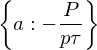

In [45]:
eqns_a = {eps_f.subs(C_subs).subs(D_subs).subs({x:a})}
a_subs = sp.solve(eqns_a,{a})
a_subs

Now all the unknown parameters are resolved. Lets put them all into a single dictionary called var_subs for convenience to avoid long substitution expressions to derive $u_\mathrm{f}$, $\varepsilon_\mathrm{f}$ and $\sigma_\mathrm{f}$.

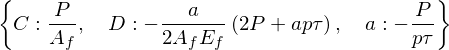

In [46]:
var_subs = {}
[var_subs.update(var) for var in [C_subs,D_subs,a_subs]]
var_subs

With the known values of integration parameters we can resolve the sought displacement fields and plot it 

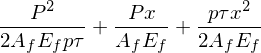

In [47]:
u_f_x = u_f.subs(var_subs)
u_f_x

Substitute for all the material and geometry parameters and the load P the value 1 and plot the curve

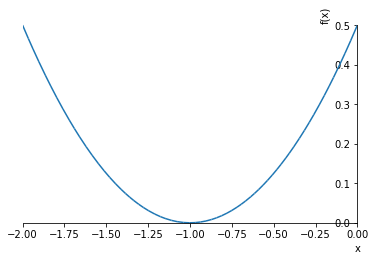

In [48]:
data_f = dict(L_b=1, p = 1, E_f = 1, A_f = 1, tau = 1)
splot( u_f_x.subs(data_f).subs({P:1}), (x,-2,0) );

Using the Heaviside step function $\theta(x)$ we can conveniently obtain a single function covering the domain of $x$ piece by piece.
\begin{align}
  u_\mathrm{fa} & = \left\{
  \begin{array}{ll}
  u_\mathrm{f}(x) & \iff x < 0 \land x > a, \; \mathrm{where} \; a = -\frac{P}{p\tau}, \\
  0      & \mathrm{otherwise}
  \end{array}
  \right.
\end{align}
Using the Heaviside function, we can write this in a more compact way as folows
\begin{align}
  u_\mathrm{fa} & = u_\mathrm{f} \, \theta(-x) \, \theta(x - a)
\end{align}

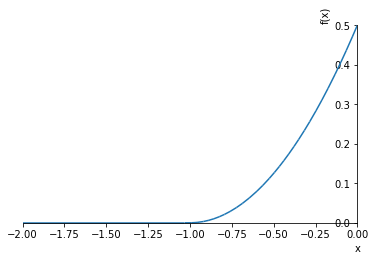

In [49]:
u_fa_x = u_f_x * sp.Heaviside(x-var_subs[a])
splot(u_fa_x.subs(data_f).subs({P:1}), (x,-2,0) )

In [50]:
eps_fa_x = sp.diff(u_fa_x,x)
sig_fa_x = 1 / E_f * eps_fa_x

## Problem solved - lets present the results
Define concrete values of the model parameters 

In [51]:
u_fa_x_data = u_fa_x.subs(data_f)
eps_fa_x_data = eps_fa_x.subs(data_f)
sig_fa_x_data = sig_fa_x.subs(data_f)

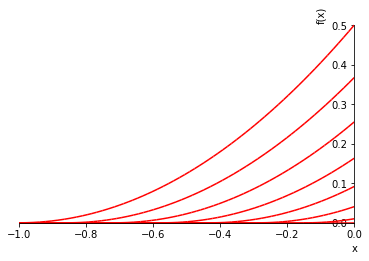

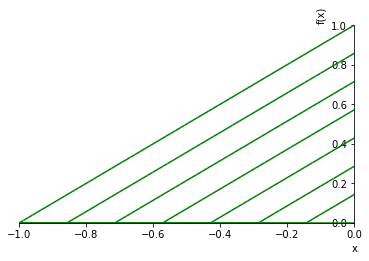

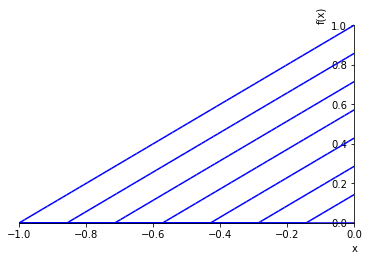

In [52]:
P_levels = np.linspace(0,1,8)
u_f_list = [u_fa_x_data.subs({P: Pl}) for Pl in P_levels] + [(x,-1,0)]
splot(*u_f_list, line_color='red')
eps_f_list = [eps_fa_x_data.subs({P: Pl}) for Pl in P_levels] + [(x,-1,0)]
splot(*eps_f_list, line_color='green')
sig_f_list = [sig_fa_x_data.subs({P: Pl}) for Pl in P_levels] + [(x,-1,0)]
splot(*sig_f_list, line_color='blue')

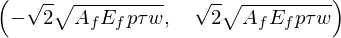

In [53]:
P_push, P_pull = sp.solve(u_f_x.subs({x:0})-w, P)
sp.simplify(P_push), sp.simplify(P_pull)

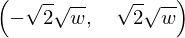

In [54]:
PW_push = P_push.subs(data_f)
PW_pull = P_pull.subs(data_f)
PW_push, PW_pull

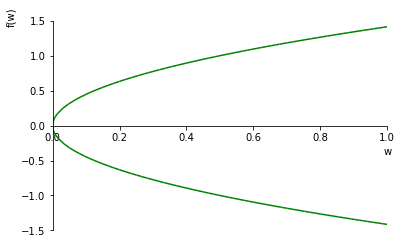

In [55]:
splot(PW_push, PW_pull, (w,0,1), line_color='green')

## Stored energy

Recall that the solved displacement field uniquely describes the state of the pullout problem for a given load $P$

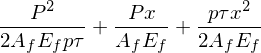

In [179]:
u_f_x

The strain and stress fields are obtained using the kinematic and quilibrium conditions, respectively.

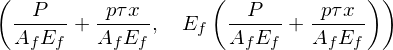

In [180]:
eps_f_x = sp.diff(u_f_x,x)
sig_f_x = E_f * eps_f_x
eps_f_x, sig_f_x

Let's check the profile of the strain. It has its maximum at the pulled out end. It is valid only in positive regime delimited by the debonded length $a$

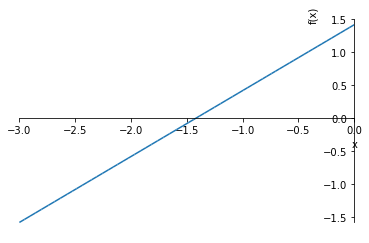

In [181]:
splot(eps_f_x.subs({P:P_pull}).subs(data_f).subs({w:1}), (x,-3,0))

The specific energy in a material point of a bar is obtained as triangle under the unloading branch in a stress-strain diagram.

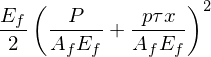

In [182]:
U_f_x = (sig_f_x * eps_f_x) / 2
U_f_x

The total stored energy is an integral over the whole domain. The strain field is only considered within the debonded length, thus setting the left integration limit to the previously solved debonded length $a$.

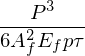

In [183]:
U = sp.integrate( U_f_x, (x,a_subs[a],0) )
U

The energy was obtained in terms of the force but we need to control it by the pullout displacement $w$. Use the previous solution of the pullout problem to substitute $w$ for $P$ to obtain the analytical solution for the energy stored in the bar. 

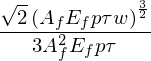

In [184]:
U_w = U.subs({P:P_pull}) 
U_w

### Remark: 
Note that the energy stored in the bond layer is zero as we are assuming purely plastic type of behavior.

## Work supply $W$

Evaluate the expression $\int P(w) \, \mathrm{d}w$

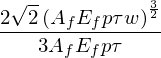

In [186]:
W_w = sp.integrate(P_pull,w)
W_w

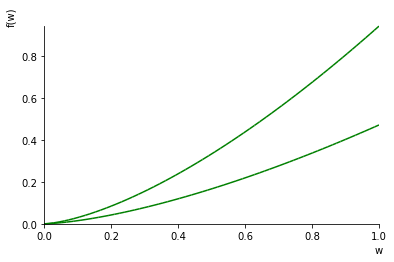

In [187]:
splot(W_w.subs(data_f), U_w.subs(data_f), (w,0,1), line_color='green')

## Released energy

Evaluate the difference between supplied and stored

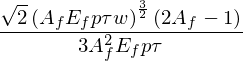

In [188]:
G_w = sp.simplify(W_w - U_w)
G_w

So if all parameters are set to 1 we get the following function for released energy of the control displacement.

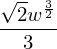

In [176]:
G_w.subs(data_f)

### Question: What is the value of stored energy if the bar has infinite Area $A$

In [191]:
sp.limit(U, A_f, sp.oo)

In [156]:
sp.limit((sp.diff(G,w) - sp.diff(W,w)), A_f, sp.oo)

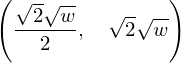

In [157]:
sp.diff(G.subs(data_f),w), sp.diff(W.subs(data_f),w)

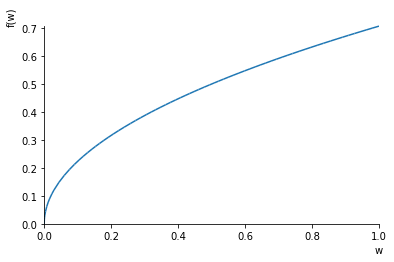

In [101]:
splot(sp.diff(G_w,w),(w,0,1))